<a href="https://colab.research.google.com/github/AlexNapoletano/AlexNapoletano/blob/main/DeepLearningFirstStep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Use seaborn for pairplot
!pip install seaborn

#from __future__ import absolute_import, division, print_function

import pathlib
import pandas as pd
import seaborn as sns
import numpy as np                          # Serve per fare calcoli matriciali
import tensorflow as tf                     # Importa libreria di TensorFlow
import matplotlib.pyplot as plt             # Serve per fare grafici

from tensorflow import keras
from tensorflow.keras import layers



In [3]:
np.random.seed(42)
X = np.random.standard_normal((20,1))

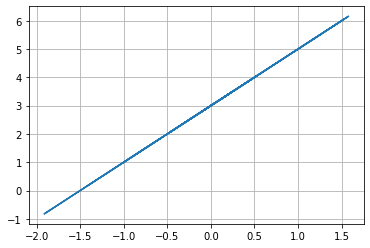

In [9]:
Y = 2 * X + 3
plt.plot(X,Y)                 # Attenzione alle Maiuscole e minuscole!!!
plt.grid(True)

In [12]:
model = tf.keras.Sequential([          # Serve per creare un modello sequenziale
    tf.keras.layers.Dense(1, input_shape=[1])             # 1 Layer da 1 Neurone
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [15]:
#@title Testo del titolo predefinito
model.compile(loss=tf.keras.losses.mean_squared_error, optimizer=tf.keras.optimizers.Adam())

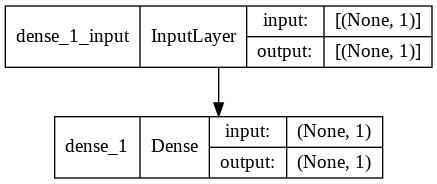

In [18]:
tf.keras.utils.plot_model(model,show_shapes=True)     # Modello grafico

In [32]:
history = model.fit(x=X, y=Y, epochs=4000)        #Esegue per 4000 volte la funzione, migliorando ogni volta la predizione con perdite sempre più inferiori

Output streaming troncato alle ultime 5000 righe.
1/1 [==============================] - 0s 6ms/step - loss: 0.0197
Epoch 1502/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0196
Epoch 1503/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.0196
Epoch 1504/4000
1/1 [==============================] - 0s 11ms/step - loss: 0.0195
Epoch 1505/4000
1/1 [==============================] - 0s 10ms/step - loss: 0.0195
Epoch 1506/4000
1/1 [==============================] - 0s 14ms/step - loss: 0.0194
Epoch 1507/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0193
Epoch 1508/4000
1/1 [==============================] - 0s 10ms/step - loss: 0.0193
Epoch 1509/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0192
Epoch 1510/4000
1/1 [==============================] - 0s 6ms/step - loss: 0.0192
Epoch 1511/4000
1/1 [==============================] - 0s 7ms/step - loss: 0.0191
Epoch 1512/4000
1/1 [==============================] - 0s 

In [33]:
y_pred=model.predict(X)       #Prende la predizione di y

In [34]:
np.c_[Y,y_pred]               #Array di Y ed y predette

array([[ 3.99342831,  3.99333239],
       [ 2.7234714 ,  2.72338605],
       [ 4.29537708,  4.29527855],
       [ 6.04605971,  6.04594612],
       [ 2.53169325,  2.53160954],
       [ 2.53172609,  2.5316422 ],
       [ 6.15842563,  6.15831137],
       [ 4.53486946,  4.53476906],
       [ 2.06105123,  2.06097126],
       [ 4.08512009,  4.0850234 ],
       [ 2.07316461,  2.07308459],
       [ 2.06854049,  2.06846046],
       [ 3.48392454,  3.48383284],
       [-0.82656049, -0.82661629],
       [-0.44983567, -0.44989467],
       [ 1.87542494,  1.87534666],
       [ 0.97433776,  0.97426701],
       [ 3.62849467,  3.62840176],
       [ 1.18395185,  1.18387926],
       [ 0.1753926 ,  0.17532849]])

In [37]:
tf.keras.losses.mean_squared_error(Y[:,0], y_pred[:,0])         #Fa il confronto tra le Y e le y predette, il risultato è la "perdita"

<tf.Tensor: shape=(), dtype=float32, numpy=7.456452e-09>

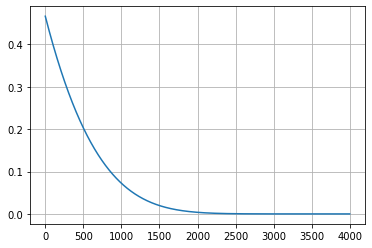

In [39]:
loss_hist=history.history['loss']         #Variabile lost_hist diventa lo storico degli errori. history è un comando di Python
plt.plot(range(4000), loss_hist)          #Crea il grafico delle perdite delle 4000 operazioni svolte sopra 
plt.grid(True)            #Attiva la griglia nel grafico

In [40]:
model.layers[0].weights     

[<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.9999833]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([2.9999123], dtype=float32)>]